In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dataset-of-songs-in-spotify/genres_v2.csv
/kaggle/input/dataset-of-songs-in-spotify/playlists.csv


In [2]:
gen = pd.read_csv('../input/dataset-of-songs-in-spotify/genres_v2.csv')
gen.head()

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (19) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_name,Unnamed: 0,title
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,...,2Vc6NJ9PW9gD9q343XFRKx,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...,https://api.spotify.com/v1/audio-analysis/2Vc6...,124539,4,Dark Trap,Mercury: Retrograde,NaN,NaN
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,...,7pgJBLVz5VmnL7uGHmRj6p,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...,https://api.spotify.com/v1/audio-analysis/7pgJ...,224427,4,Dark Trap,Pathology,NaN,NaN
2,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,0.0391,...,0vSWgAlfpye0WCGeNmuNhy,spotify:track:0vSWgAlfpye0WCGeNmuNhy,https://api.spotify.com/v1/tracks/0vSWgAlfpye0...,https://api.spotify.com/v1/audio-analysis/0vSW...,98821,4,Dark Trap,Symbiote,NaN,NaN
3,0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,...,0VSXnJqQkwuH2ei1nOQ1nu,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...,https://api.spotify.com/v1/audio-analysis/0VSX...,123661,3,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote),NaN,NaN
4,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,...,4jCeguq9rMTlbMmPHuO7S3,spotify:track:4jCeguq9rMTlbMmPHuO7S3,https://api.spotify.com/v1/tracks/4jCeguq9rMTl...,https://api.spotify.com/v1/audio-analysis/4jCe...,123298,4,Dark Trap,Venom,NaN,NaN


In [3]:
play = pd.read_csv('../input/dataset-of-songs-in-spotify/playlists.csv')
play.head()

,Playlist,Genre
0,19WuHd4MxWLzE1fpMmw4S4,Dark Trap
1,6XyR8uzgkSoDzHuOxxRtLH,Dark Trap
2,37Ij3ofyhvEhFEH8YZMZ2X,Dark Trap
3,07zTlfPpsxeoWdumbkNWMI,Dark Trap
4,2dClSRLsnptdkDQnpi5H2f,Dark Trap


In [4]:
gen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42305 entries, 0 to 42304
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      42305 non-null  float64
 1   energy            42305 non-null  float64
 2   key               42305 non-null  int64  
 3   loudness          42305 non-null  float64
 4   mode              42305 non-null  int64  
 5   speechiness       42305 non-null  float64
 6   acousticness      42305 non-null  float64
 7   instrumentalness  42305 non-null  float64
 8   liveness          42305 non-null  float64
 9   valence           42305 non-null  float64
 10  tempo             42305 non-null  float64
 11  type              42305 non-null  object 
 12  id                42305 non-null  object 
 13  uri               42305 non-null  object 
 14  track_href        42305 non-null  object 
 15  analysis_url      42305 non-null  object 
 16  duration_ms       42305 non-null  int64 

In [5]:
gen.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,Unnamed: 0
count,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,20780.000000
mean,0.639364,0.762516,5.370240,-6.465442,0.549462,0.136561,0.096160,0.283048,0.214079,0.357101,147.474056,250865.846685,3.972580,10483.970645
std,0.156617,0.183823,3.666145,2.941165,0.497553,0.126168,0.170827,0.370791,0.175576,0.233200,23.844623,102957.713571,0.268342,6052.359519
min,0.065100,0.000243,0.000000,-33.357000,0.000000,0.022700,0.000001,0.000000,0.010700,0.018700,57.967000,25600.000000,1.000000,0.000000
25%,0.524000,0.632000,1.000000,-8.161000,0.000000,0.049100,0.001730,0.000000,0.099600,0.161000,129.931000,179840.000000,4.000000,5255.750000
50%,0.646000,0.803000,6.000000,-6.234000,1.000000,0.075500,0.016400,0.005940,0.135000,0.322000,144.973000,224760.000000,4.000000,10479.500000
75%,0.766000,0.923000,9.000000,-4.513000,1.000000,0.193000,0.107000,0.722000,0.294000,0.522000,161.464000,301133.000000,4.000000,15709.250000
max,0.988000,1.000000,11.000000,3.148000,1.000000,0.946000,0.988000,0.989000,0.988000,0.988000,220.290000,913052.000000,5.000000,20999.000000


In [6]:
gen.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms',
       'time_signature', 'genre', 'song_name', 'Unnamed: 0', 'title'],
      dtype='object')

# Data Cleaning

In [7]:
gen.isnull().sum()

danceability            0
energy                  0
key                     0
loudness                0
mode                    0
speechiness             0
acousticness            0
instrumentalness        0
liveness                0
valence                 0
tempo                   0
type                    0
id                      0
uri                     0
track_href              0
analysis_url            0
duration_ms             0
time_signature          0
genre                   0
song_name           20786
Unnamed: 0          21525
title               21525
dtype: int64

In [8]:
gen.drop('Unnamed: 0', axis=1, inplace=True)

In [9]:
gen.shape

(42305, 21)

In [10]:
gen.song_name.fillna(method='ffill', inplace=True)

In [11]:
gen.title.fillna(method='ffill', inplace=True)

In [12]:
gen.drop('title', axis=1, inplace=True)

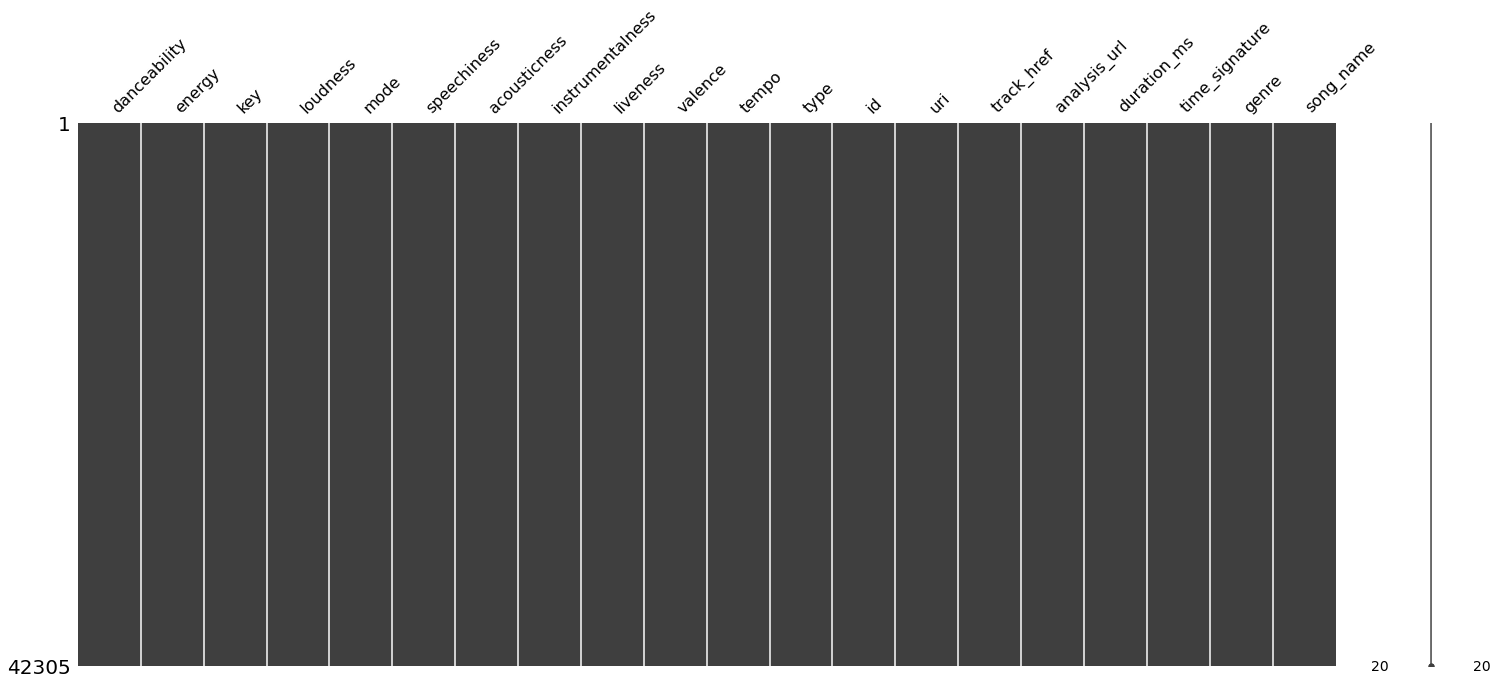

In [13]:
import missingno as mn
mn.matrix(gen)

# EDA

In [14]:
gen.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_name
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,156.985,audio_features,2Vc6NJ9PW9gD9q343XFRKx,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...,https://api.spotify.com/v1/audio-analysis/2Vc6...,124539,4,Dark Trap,Mercury: Retrograde
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,115.080,audio_features,7pgJBLVz5VmnL7uGHmRj6p,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...,https://api.spotify.com/v1/audio-analysis/7pgJ...,224427,4,Dark Trap,Pathology
2,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,0.0391,218.050,audio_features,0vSWgAlfpye0WCGeNmuNhy,spotify:track:0vSWgAlfpye0WCGeNmuNhy,https://api.spotify.com/v1/tracks/0vSWgAlfpye0...,https://api.spotify.com/v1/audio-analysis/0vSW...,98821,4,Dark Trap,Symbiote
3,0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,186.948,audio_features,0VSXnJqQkwuH2ei1nOQ1nu,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...,https://api.spotify.com/v1/audio-analysis/0VSX...,123661,3,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote)
4,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,147.988,audio_features,4jCeguq9rMTlbMmPHuO7S3,spotify:track:4jCeguq9rMTlbMmPHuO7S3,https://api.spotify.com/v1/tracks/4jCeguq9rMTl...,https://api.spotify.com/v1/audio-analysis/4jCe...,123298,4,Dark Trap,Venom


In [15]:
gen.type.unique()

array(['audio_features'], dtype=object)

In [16]:
gen.type = pd.get_dummies(gen.type)

In [17]:
gen.head(2)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_name
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.0134,0.0556,0.389,156.985,1,2Vc6NJ9PW9gD9q343XFRKx,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...,https://api.spotify.com/v1/audio-analysis/2Vc6...,124539,4,Dark Trap,Mercury: Retrograde
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.0000,0.1180,0.124,115.080,1,7pgJBLVz5VmnL7uGHmRj6p,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...,https://api.spotify.com/v1/audio-analysis/7pgJ...,224427,4,Dark Trap,Pathology


In [18]:
gen.loudness.unique()

array([-7.364, -7.23 , -4.783, ..., -5.469, -3.893, -3.33 ])

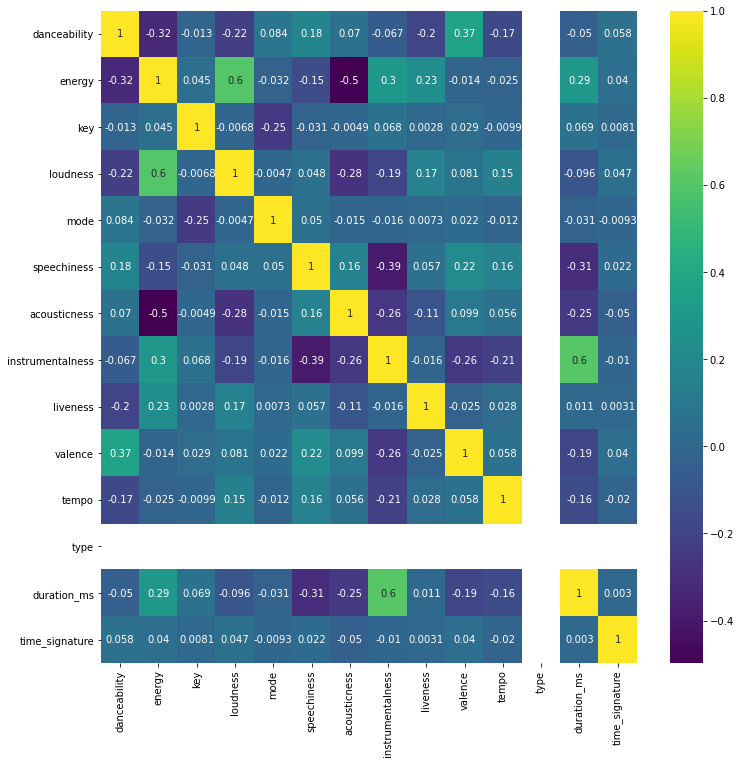

In [19]:
plt.figure(figsize=(12,12))
sns.heatmap(gen.corr(), annot=True, cmap='viridis')

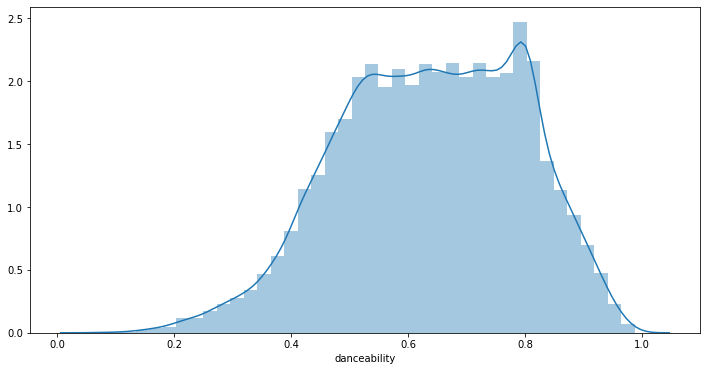

In [20]:
plt.figure(figsize=(12,6))
sns.distplot(gen.danceability, bins=40)

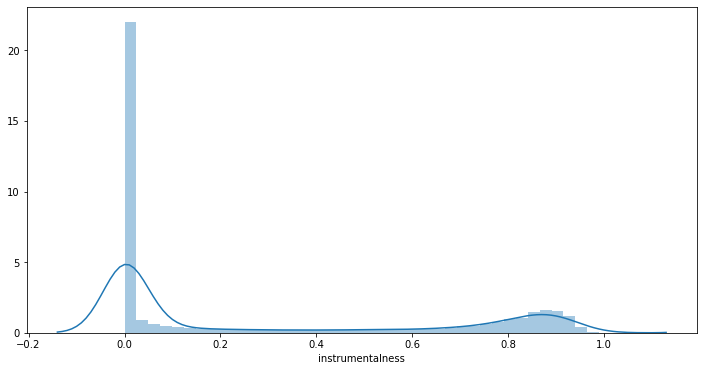

In [21]:
plt.figure(figsize=(12,6))
sns.distplot(gen.instrumentalness, bins=40)

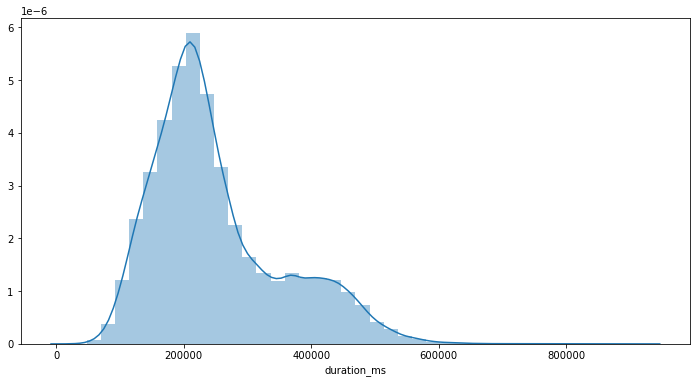

In [22]:
plt.figure(figsize=(12,6))
sns.distplot(gen.duration_ms, bins=40)

In [23]:
gen.genre.unique()

array(['Dark Trap', 'Underground Rap', 'Trap Metal', 'Emo', 'Rap', 'RnB',
       'Pop', 'Hiphop', 'techhouse', 'techno', 'trance', 'psytrance',
       'trap', 'dnb', 'hardstyle'], dtype=object)

In [24]:
px.pie(gen.genre, labels=gen.genre.value_counts().index, values = gen.genre.value_counts().values)

In [25]:
gen.time_signature.unique()

array([4, 3, 5, 1])

In [26]:
song = gen.song_name.value_counts().head(15)
song

Still D.R.E.      20787
Forever              14
Lost                 12
Revenge              11
Numb                 11
Runaway              11
Scars                11
Alone                11
Hollow               11
PTSD                 11
Lonely               10
Leave Me Alone       10
Beautiful             9
Intro                 9
Energy                9
Name: song_name, dtype: int64

In [27]:
px.scatter(song.index, song.values)

In [28]:
df = gen[['key', 'energy']]

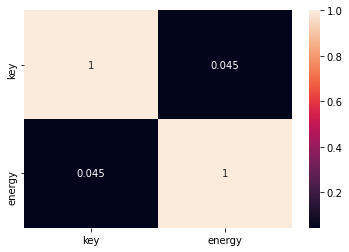

In [29]:
sns.heatmap(df.corr(), annot=True)

In [30]:
px.histogram(gen.acousticness)

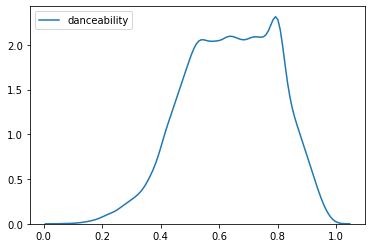

In [31]:
sns.kdeplot(gen.danceability)

*Work under progress*